In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

Linear regression

In [2]:
Xtrain = np.arange(0,1,0.01).reshape(-1, 1)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,100).reshape(-1, 1)
model = LinearRegression().fit(Xtrain.reshape(-1, 1), ytrain.reshape(-1, 1))
print(model.intercept_, model.coef_)


[0.19404849] [[9.71812168]]


Plotting model predictions

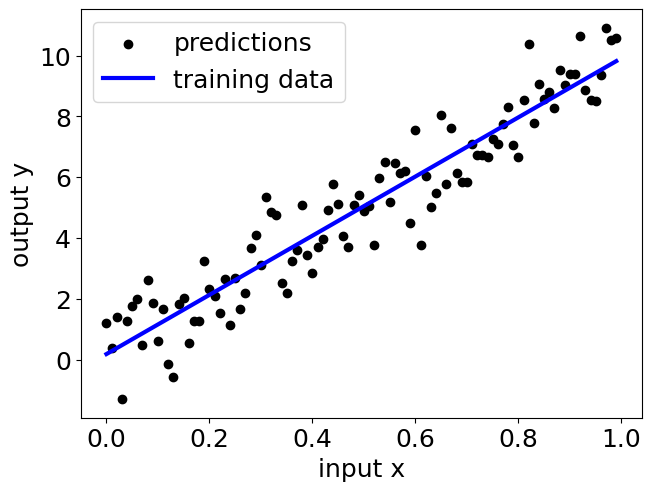

In [3]:
ypred = model.predict(Xtrain)
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='black')
plt.plot(Xtrain, ypred, color='blue', linewidth=3)
plt.xlabel('input x'); plt.ylabel('output y')
plt.legend(['predictions','training data'])
plt.show()

Logistic regression

In [4]:
Xtrain = np.random.uniform(0,1,100)
ytrain = np.sign(Xtrain-0.5)
Xtrain = Xtrain.reshape(-1, 1)
model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -235.651466, slope 471.616872


Plotting predictions

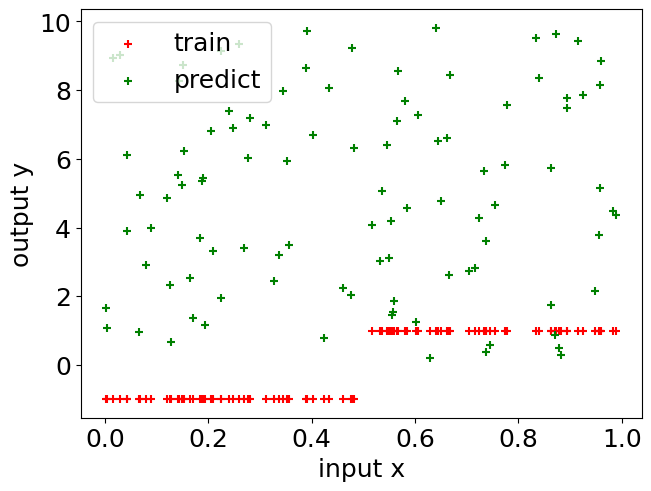

In [5]:
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.scatter(Xtrain, ypred, color='green', marker='+')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["train","predict"])
plt.show()

Logistic regression

In [6]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
print("intercept %f, slope %f"%(model.intercept_, model.coef_))

intercept -1.738187, slope 3.732331


Hold-Out Method

In [7]:
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
X = np.arange(0,1,0.05).reshape(-1, 1)
y = 10*X + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
for i in range(5):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
    model = LinearRegression().fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_, mean_squared_error(ytest,ypred)))

intercept -0.274316, slope 10.747270, square error 0.874429
intercept 0.160442, slope 9.906517, square error 1.134118
intercept -0.600375, slope 11.290865, square error 2.039870
intercept -0.322297, slope 10.892061, square error 1.486475
intercept 0.295533, slope 10.299560, square error 2.360262


sklearnk-Fold Cross-validation

In [8]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()))
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    model = LinearRegression().fit(X[train], y[train])
    ypred = model.predict(X[test]) 
    print("intercept %f, slope %f, square error %f"%(model.intercept_, model.coef_,mean_squared_error(y[test],ypred)))

[-0.52556815 -1.44787972 -0.97430973 -1.3234674  -1.51660264]
Accuracy: -1.16 (+/− 0.37)
intercept 0.140228, slope 10.200499, square error 0.525568
intercept -0.072208, slope 10.525276, square error 1.447880
intercept -0.012517, slope 10.366672, square error 0.974310
intercept 0.028506, slope 10.420697, square error 1.323467
intercept 0.178466, slope 9.926055, square error 1.516603


Tuning Model Hyperparameters

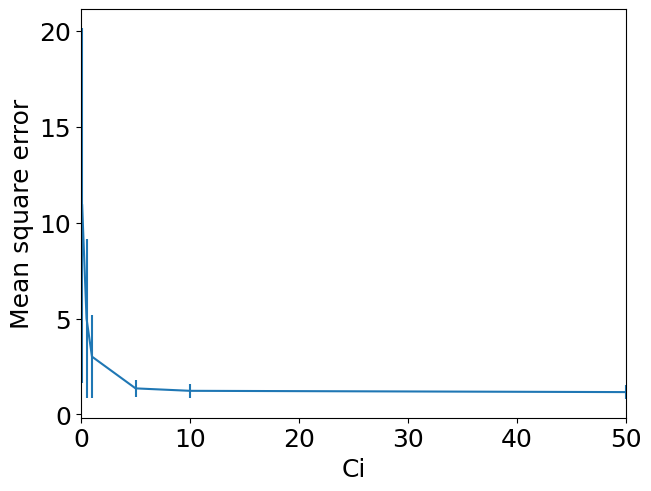

In [9]:
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 50, 100]
for Ci in Ci_range:
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=1/(2*Ci))
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.xlim((0,50))
plt.show()

Tuning Model Hyperparameters

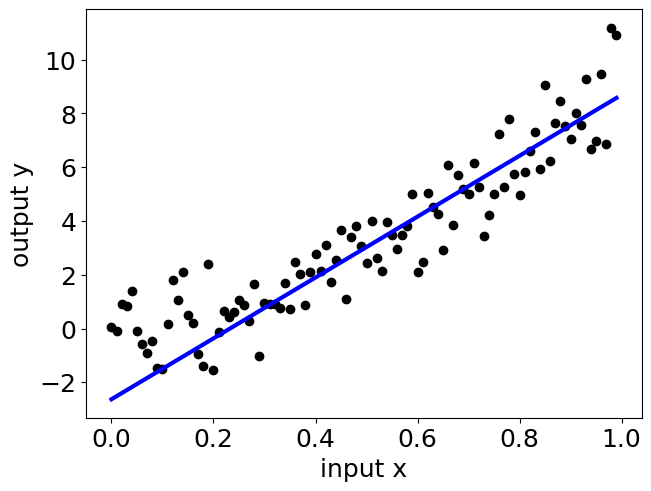

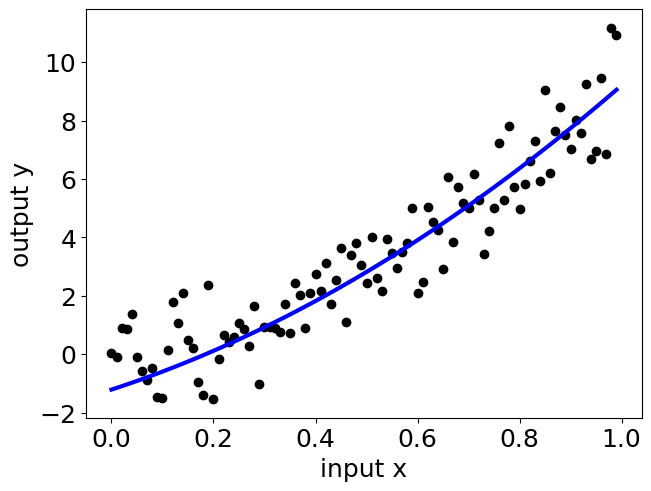

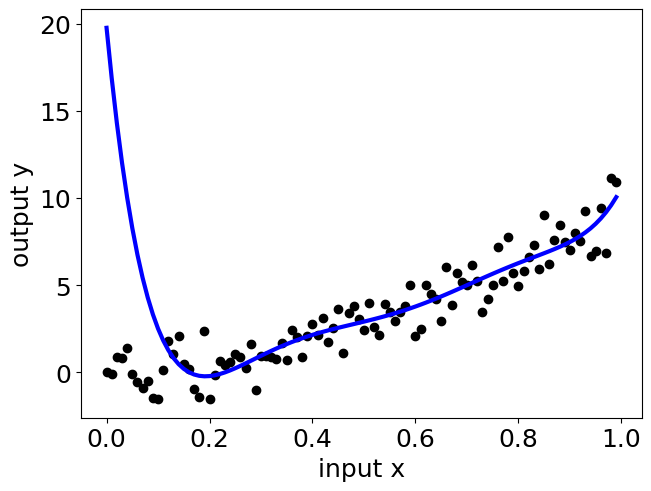

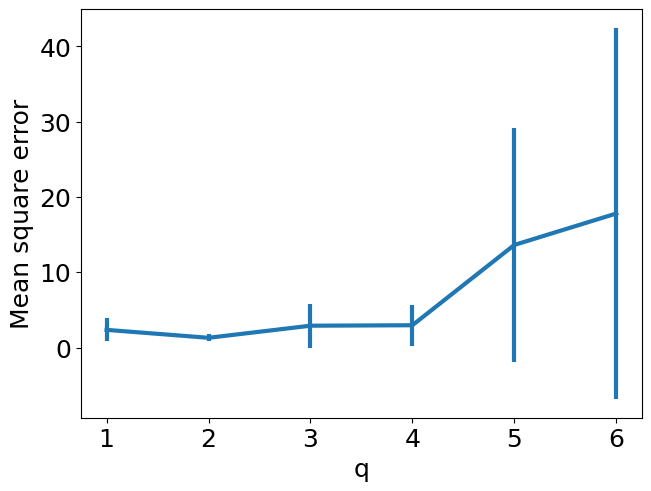

In [10]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = 10*(X**2) + np.random.normal(0.0,1.0,X.size).reshape(-1, 1)
kf = KFold(n_splits=5)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
mean_error=[]; std_error=[]
q_range = [1,2,3,4,5,6]
for q in q_range:
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    model = LinearRegression()
    temp=[]; plotted = False
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train], y[train])
        ypred = model.predict(Xpoly[test])
        temp.append(mean_squared_error(y[test],ypred))
        if ((q==1) or (q==2) or (q==6)) and not plotted:
            plt.scatter(X, y, color='black')
            ypred = model.predict(Xpoly)
            plt.plot(X, ypred, color='blue', linewidth=3)
            plt.xlabel("input x"); plt.ylabel("output y")
            plt.show()
            plotted = True
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(q_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('q')
plt.ylabel('Mean square error')
plt.show()

Python Code For Baseline Predictor Gaussian Noise Example

square error 0.648839 0.560880


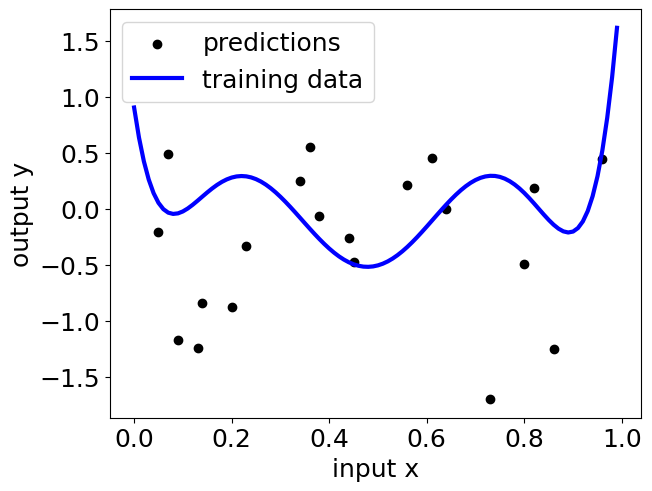

In [11]:
X = np.arange(0,1,0.01).reshape(-1, 1)
y = np.random.normal(0.0,1.0,X.size).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

Xtrain_poly = PolynomialFeatures(6).fit_transform(Xtrain)
Xtest_poly = PolynomialFeatures(6).fit_transform(Xtest)
X_poly = PolynomialFeatures(6).fit_transform(X)

model = LinearRegression().fit(Xtrain_poly, ytrain)

ypred = model.predict(Xtest_poly)

from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy="mean").fit(Xtrain_poly, ytrain)
ydummy = dummy.predict(Xtest_poly)

print("square error %f %f"%(mean_squared_error(ytest,ypred),mean_squared_error(ytest,ydummy)))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtest, ytest, color='black')
ypred = model.predict(X_poly)
plt.plot(X, ypred, color='blue', linewidth=3)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predictions","training data"])
plt.show()

Movie Review Example

Confusion Matrix for LinearSVC:
[[3 8]
 [6 3]]
Classification Report for LinearSVC:
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        11
           1       0.27      0.33      0.30         9

    accuracy                           0.30        20
   macro avg       0.30      0.30      0.30        20
weighted avg       0.31      0.30      0.30        20

Confusion Matrix for DummyClassifier:
[[ 0 11]
 [ 0  9]]
Classification Report for DummyClassifier:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       0.45      1.00      0.62         9

    accuracy                           0.45        20
   macro avg       0.72      0.50      0.31        20
weighted avg       0.75      0.45      0.28        20



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, in

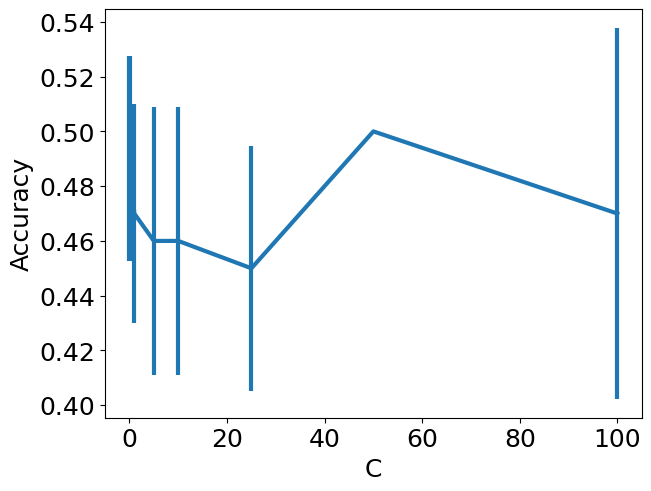

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Generate some sample data for X and y
X = np.random.rand(100, 2)
y = np.random.choice([0, 1], size=100)

# Split the data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# Fit LinearSVC model
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
preds = model.predict(Xtest)

# Print confusion matrix and classification report for LinearSVC
print("Confusion Matrix for LinearSVC:")
print(confusion_matrix(ytest, preds))

print("Classification Report for LinearSVC:")
print(classification_report(ytest, preds, zero_division=1))  # Set zero_division to 1

# Fit DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)

# Print confusion matrix and classification report for DummyClassifier
print("Confusion Matrix for DummyClassifier:")
print(confusion_matrix(ytest, ydummy))

print("Classification Report for DummyClassifier:")
print(classification_report(ytest, ydummy, zero_division=1))  # Set zero_division to 1

mean_error = []
std_error = []
C_range = [0.01, 0.1, 1, 5, 10, 25, 50, 100]

for C in C_range:
    model = LinearSVC(C=C)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Use 'accuracy' for scoring
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
plt.errorbar(C_range, mean_error, yerr=std_error, linewidth=3)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



ROC Curve

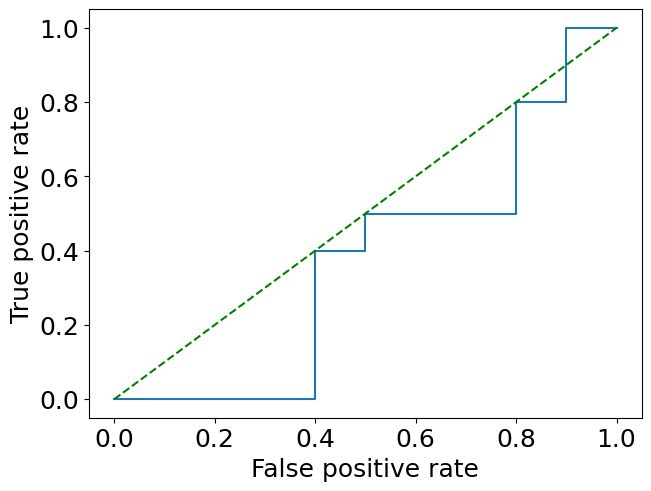

In [13]:
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearSVC(C=1.0).fit(Xtrain, ytrain)
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()

k-Nearest Neighbour (kNN) Classifier Code

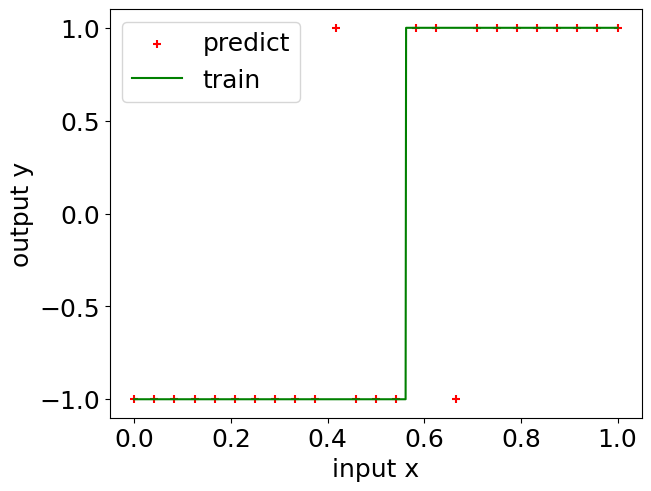

In [14]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

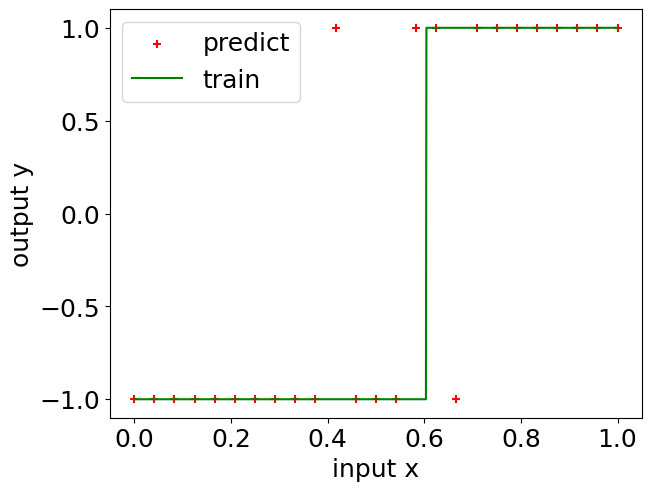

In [15]:

model = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code

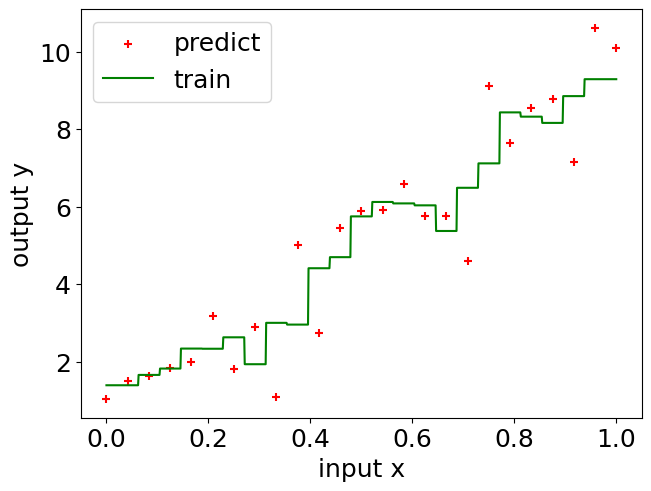

In [16]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,m)
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)
Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

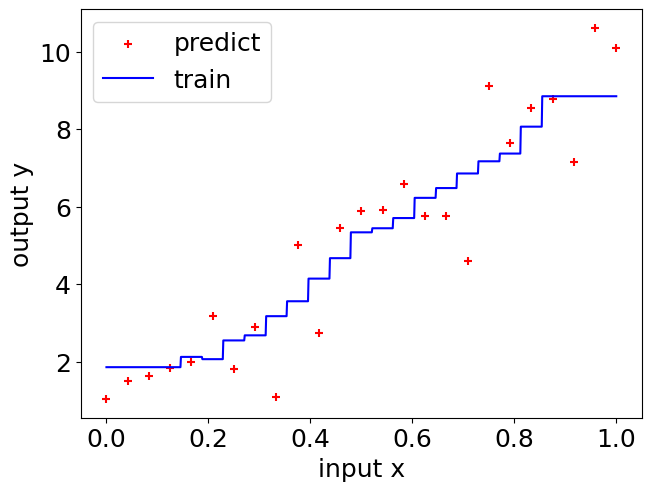

In [17]:
model2 = KNeighborsRegressor(n_neighbors=7,weights='uniform').fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.xlabel("input x"); plt.ylabel("output y"); plt.legend(["predict","train"])
plt.show()

k-Nearest Neighbour (kNN) Regression Code (cont)

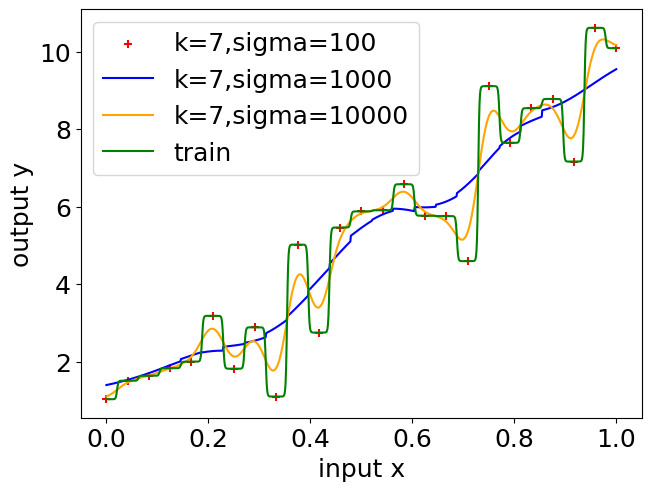

In [18]:
def gaussian_kernel100(distances):
    weights = np.exp(-100*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel1000(distances):
    weights = np.exp(-1000*(distances**2))
    return weights/np.sum(weights)

def gaussian_kernel10000(distances):
    weights = np.exp(-10000*(distances**2))
    return weights/np.sum(weights)

model2 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel100).fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
model3 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel1000).fit(Xtrain, ytrain)
ypred3 = model3.predict(Xtest)
model4 = KNeighborsRegressor(n_neighbors=7,weights=gaussian_kernel10000).fit(Xtrain, ytrain)
ypred4 = model4.predict(Xtest)

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred2, color='blue')
plt.plot(Xtest, ypred3, color='orange')
plt.plot(Xtest, ypred4, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["k=7,sigma=100","k=7,sigma=1000","k=7,sigma=10000","train"])
plt.show()

Decision Tree code

|--- feature_0 <= 0.56
|   |--- class: -1.0
|--- feature_0 >  0.56
|   |--- feature_0 <= 0.65
|   |   |--- feature_0 <= 0.60
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.60
|   |   |   |--- class: -1.0
|   |--- feature_0 >  0.65
|   |   |--- class: 1.0



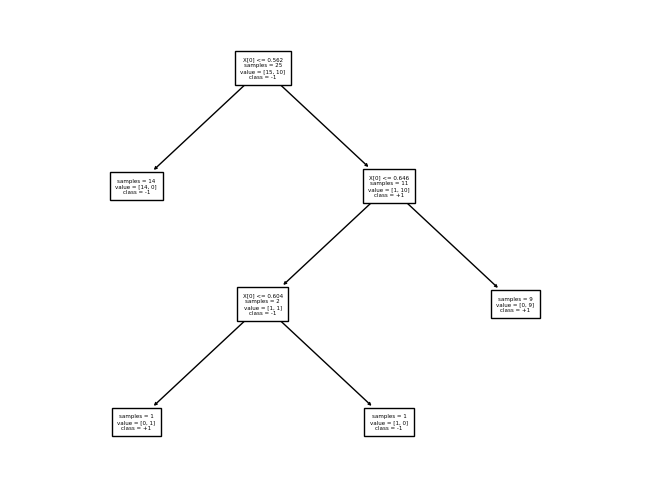

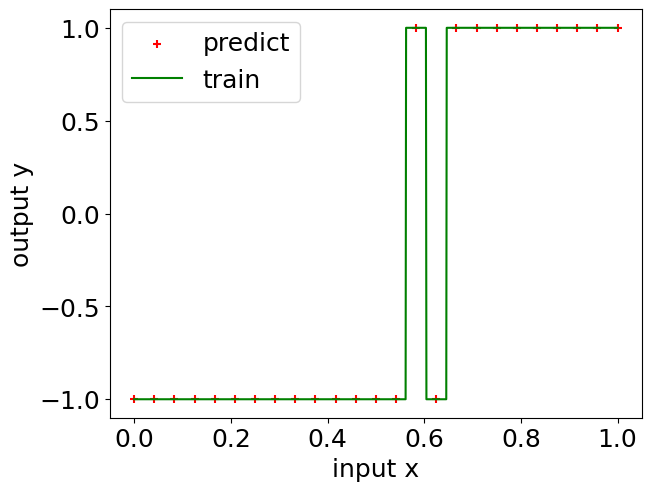

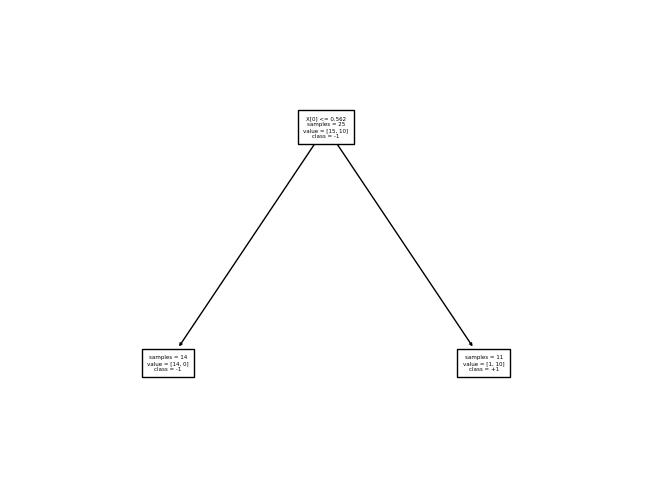

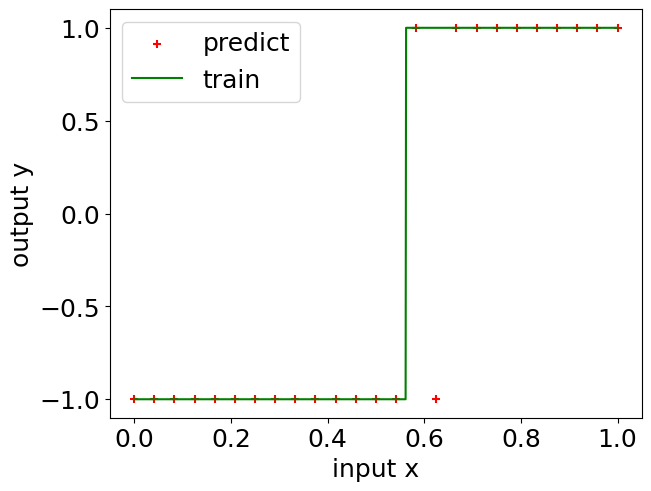

In [19]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)

from sklearn.tree import export_text
print(export_text(model))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

model = DecisionTreeClassifier(max_depth=1).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

plot_tree(model, fontsize=4, impurity=False, class_names=['-1','+1'])
plt.show()

plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["predict","train"])
plt.show()

Multi-Layer Perceptron (MLP)

C 1



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

C 5



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

C 10



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

C 100



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C 1000



c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum itera

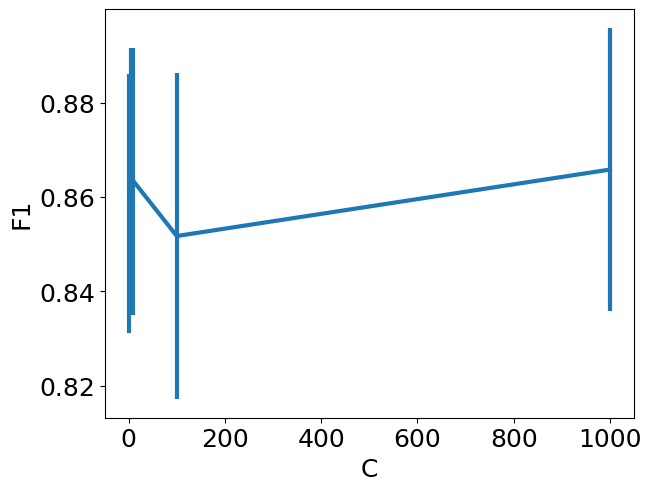

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

plt.rc('font', size=18);plt.rcParams['figure.constrained_layout.use'] = True

crossval=False
if crossval:
    mean_error=[]; std_error=[]
    hidden_layer_range = [5,10,25,50,75,100]
    for n in hidden_layer_range:
        print("hidden layer size %d\n"%n)
        model = MLPClassifier(hidden_layer_sizes=(n), max_iter=300)
        scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        mean_error.append(np.array(scores).mean())
        std_error.append(np.array(scores).std())
    plt.errorbar(hidden_layer_range,mean_error,yerr=std_error,linewidth=3)
    plt.xlabel('#hidden layer nodes'); plt.ylabel('F1')
    plt.show()

mean_error=[]; std_error=[]
C_range = [1,5,10,100,1000]
for Ci in C_range:
    print("C %d\n"%Ci)
    model = MLPClassifier(hidden_layer_sizes=(5), alpha = 1.0/Ci)
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())
    
plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C'); plt.ylabel('F1')
plt.show()

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[90  7]
 [19 84]]
[[ 97   0]
 [103   0]]
[0 1]


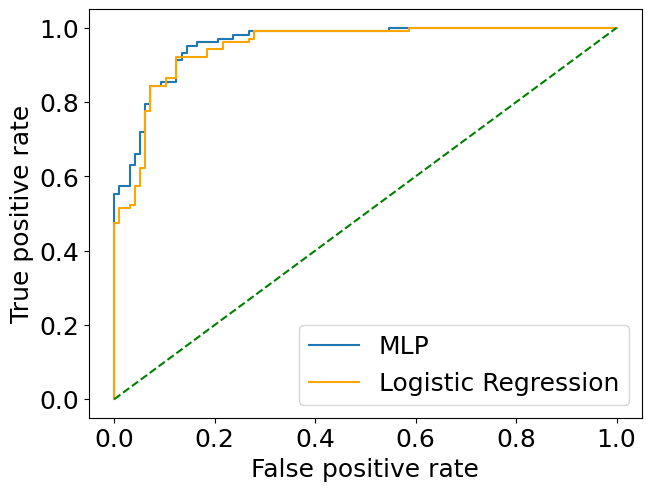

In [21]:
model = MLPClassifier(hidden_layer_sizes=(5), alpha=1.0/5).fit(Xtrain, ytrain)
preds = model.predict(Xtest)
print(confusion_matrix(ytest, preds))
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print(confusion_matrix(ytest, ydummy))

from sklearn.metrics import roc_curve
preds = model.predict_proba(Xtest)
print(model.classes_)
fpr, tpr, _ = roc_curve(ytest,preds[:,1])
plt.plot(fpr,tpr)

model = LogisticRegression(C=10000).fit(Xtrain, ytrain)
fpr, tpr, _ = roc_curve(ytest,model.decision_function(Xtest))
plt.plot(fpr,tpr,color='orange')
plt.legend(['MLP','Logistic Regression'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], color='green',linestyle='--')
plt.show()

Classification Example Python Code

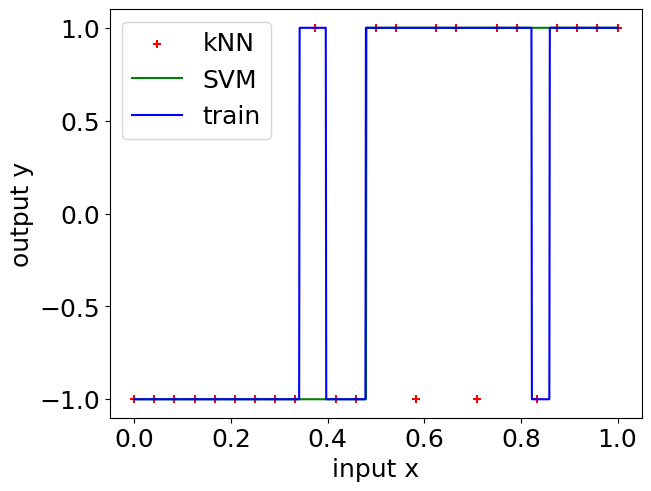

In [22]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = np.sign(Xtrain-0.5+np.random.normal(0,0.2,m))
Xtrain = Xtrain.reshape(-1, 1)

def gaussian_kernel(distances):
    weights = np.exp(-100*(distances**2))
    return weights

model = KNeighborsClassifier(n_neighbors=25,weights=gaussian_kernel).fit(Xtrain, ytrain)

Xtest=np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')

from sklearn.svm import SVC
model = SVC(C=1000, kernel='rbf', gamma=50).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.plot(Xtest, ypred, color='blue')

plt.xlabel("input x"); 
plt.ylabel("output y")
plt.legend(["kNN","SVM","train"])
plt.show()

Regression Example Python Code

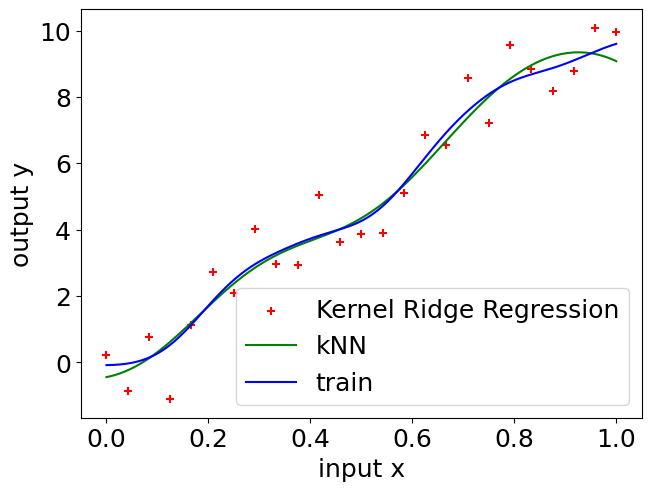

In [23]:
m = 25
Xtrain = np.linspace(0.0,1.0,num=m)
ytrain = 10*Xtrain + np.random.normal(0.0,1.0,m)
Xtrain = Xtrain.reshape(-1, 1)
from sklearn.kernel_ridge import KernelRidge
C = 10
model = KernelRidge(alpha=1.0/C, kernel='rbf', gamma=10).fit(Xtrain, ytrain)

Xtest = np.linspace(0.0,1.0,num=1000).reshape(-1, 1)
ypred = model.predict(Xtest)

def gaussian_kernel(distances):
    weights = np.exp(-100*(distances**2))
    return weights

model2 = KNeighborsRegressor(n_neighbors=m,weights=gaussian_kernel).fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(Xtrain, ytrain, color='red', marker='+')
plt.plot(Xtest, ypred, color='green')
plt.plot(Xtest, ypred2, color='blue')
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(["Kernel Ridge Regression","kNN","train"])
plt.show()

Circle Example Python Code

C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_22632\2480920344.py:13: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)


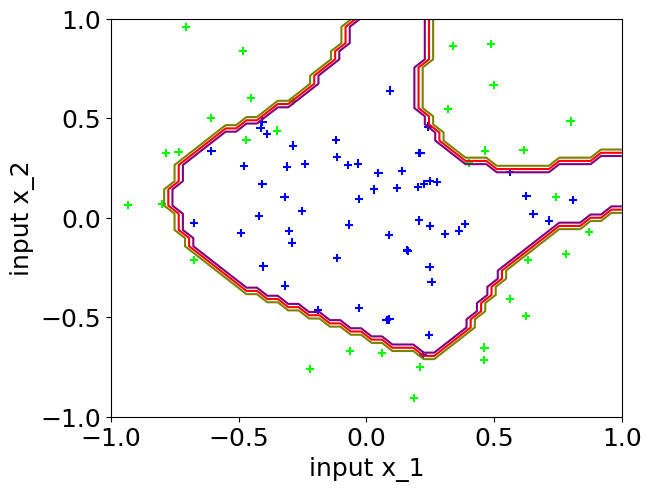

C:\Users\M2-Winterfell\AppData\Local\Temp\ipykernel_22632\2480920344.py:26: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)


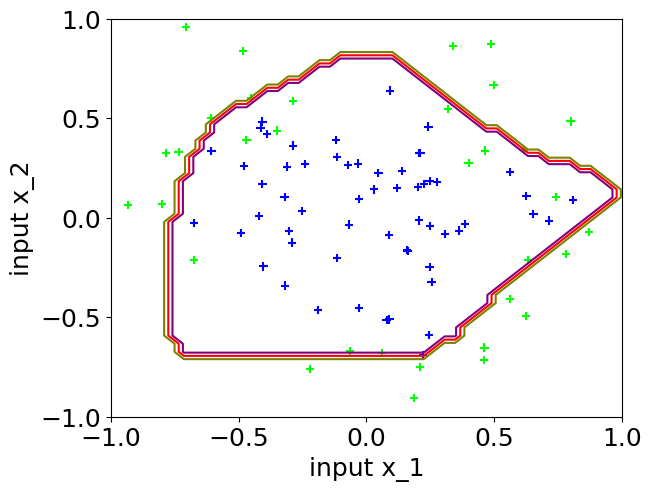

In [24]:
m = 100
Xtrain = 0.5*np.random.randn(m,2)
ytrain = np.sign((Xtrain[:,0]**2+Xtrain[:,1]**2)-0.5+np.random.normal(0,0.2,m))

plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True

xx,yy = np.meshgrid(np.linspace(-1, 1, 50),np.linspace(-1, 1, 50))
Xtest = np.c_[xx.ravel(), yy.ravel()]
ytest = np.sign((xx**2+yy**2)-0.5)

model = SVC(C=1000, kernel='rbf', gamma=1).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)
#plt.scatter(xx,yy,marker='.',c=ypred.reshape(xx.shape),cmap=plt.cm.brg)
plt.scatter(Xtrain[:,0],Xtrain[:,1],marker='+',c=ytrain,cmap=plt.cm.brg)
plt.xlim((-1,1)); plt.ylim((-1,1))
plt.xlabel("input x_1"); plt.ylabel("input x_2")
plt.show()

def gaussian_kernel(distances):
    weights = np.exp(-10*(distances**2))
    return weights

model = KNeighborsClassifier(n_neighbors=m,weights=gaussian_kernel).fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
plt.contour(xx,yy, ypred.reshape(xx.shape), c=ypred,cmap=plt.cm.brg, levels=2)
plt.scatter(Xtrain[:,0],Xtrain[:,1],marker='+',c=ytrain,cmap=plt.cm.brg)
plt.xlim((-1,1)); plt.ylim((-1,1))
plt.xlabel("input x_1"); plt.ylabel("input x_2")
plt.show()

Text Preprocessing

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M2-Winterfell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = CountVectorizer().build_tokenizer()
print(tokenizer("Here's example text, isn't it?"))
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import word_tokenize
print(WhitespaceTokenizer().tokenize("Here's example text, isn't it?"))
print(word_tokenize("Here's example text, isn't it?"))

print(tokenizer("likes liking liked"))
print(WhitespaceTokenizer().tokenize("likes liking liked"))
print(word_tokenize("likes liking liked"))

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokens = word_tokenize("Here's example text, isn't it?")
stems = [stemmer.stem(token) for token in tokens]
print(stems)

tokens = word_tokenize("likes liking liked")
stems = [stemmer.stem(token) for token in tokens]
print(stems)

['Here', 'example', 'text', 'isn', 'it']
["Here's", 'example', 'text,', "isn't", 'it?']
['Here', "'s", 'example', 'text', ',', 'is', "n't", 'it', '?']
['likes', 'liking', 'liked']
['likes', 'liking', 'liked']
['likes', 'liking', 'liked']
['here', "'s", 'exampl', 'text', ',', 'is', "n't", 'it', '?']
['like', 'like', 'like']


Python Bag of Words Example

In [32]:
docs = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [33]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and the', 'first document', 'is the', 'is this', 'second document', 'second second', 'the first', 'the second', 'the third', 'third one', 'this is', 'this the']
[[0 1 1 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 1]]


Remove Stop Words & Rare Words

In [34]:
nltk.download('stopwords')
vectorizer = CountVectorizer(stop_words=nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M2-Winterfell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Python TF-IDF Example

In [38]:
docs = [
'This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
X = vectorizer.fit_transform(docs)
X_array = np.around(X.toarray(), 2)
print(vectorizer.get_feature_names())
print(X_array)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.   1.22 1.51 1.22 0.   0.   1.   0.   1.22]
 [0.   1.22 0.   1.22 0.   3.83 1.   0.   1.22]
 [1.92 0.   0.   0.   1.92 0.   1.   1.92 0.  ]
 [0.   1.22 1.51 1.22 0.   0.   1.   0.   1.22]]


c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Python Code For Recommending News Articles

In [42]:
# Load the entire CSV file
#df = pd.read_csv("articles1.csv")

# Extract the first 1000 rows
#df_first_1000 = df.head(1000)

# Save the extracted data to a new CSV file
#df_first_1000.to_csv("articles1_1000.csv", index=False)


In [43]:
# first 1000 articles from news dataset at https://www.kaggle.com/snapcrack/all−the−news
text = pd.read_csv('articles1_1000.csv')
text.head()

x = text['content']
vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.2)
X = vectorizer.fit_transform(x)
indices = np.arange(x.size)

train, test = train_test_split(indices, test_size=0.2)

from sklearn.metrics.pairwise import cosine_distances
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3,metric=cosine_distances).fit(X[train])

test=[test[0]]
found = nbrs.kneighbors(X[test], return_distance=False)

test_i=0
print('text:\n%.300s'%x[test[test_i]])
for i in found[0]:
    print('match %d:\n%.300s'%(i,x[train[i]]))

text:
Laughter saved Linda Ragoo’s face. That is what a doctor told her after she had a stroke in 2003. It happened on a Sunday, at the end of an exhausting weekend of chores, errands and obligations. Ms. Ragoo felt part of her body go numb. “I sat down by the bed and I felt my leg, like it was sleeping,”
match 149:
They treaded water for seven hours before a neighbor heard their screams. On Oct. 29, 2012, Hurricane Sandy flooded Staten Island. As the storm surge peaked at 14 feet in the borough  —   among the highest levels across New York City  —   the water crashed through the walls of their house, and DeBra
match 326:
Surrounded by her five grandchildren who live with her, Sandra Parker asserted her unconditional love for each one. The oldest, Akiea Brewer, 19, who identifies as transgender, interrupted to express her doubt. Ms. Parker’s reply was swift and unequivocal: “I was never mad at you for being who you a
match 78:
Queen Elizabeth II made her first public appearance in almo